<a href="https://colab.research.google.com/github/KutuDev/ICR/blob/main/ICR_NB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link to project doc](https://docs.google.com/document/d/1gvfd2d4TLOMZ2jkwtthcujIqy0_Oy39adKtCkTc5qCo/edit)

# Approach
* 1. Deep learning based **entirely**. DL for all of table detection recognition, digit-strings/texts recognition. 
* 2. Hybrid-type. CV for table cell recognition and DL for digit-strings/texts recognition. 

# Dependencies

In [ ]:
# !pip install pdf2image

# Part 1: Dataset
* Data importation
* Preprocessing

In [21]:
# !rm -r ICR

In [22]:
!git clone https://github.com/KutuDev/ICR

Cloning into 'ICR'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


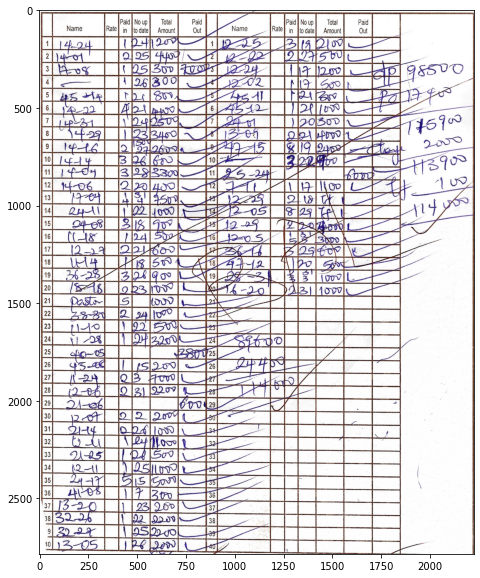

In [23]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/ICR/sampleData/images/wunmi.jpg')
  
plt.figure(figsize=(10,10))
plt.imshow(img, cmap=None)

In [24]:
import os

dpi = 100

out_folder = '/content/ICR/outputData'
os.makedirs(out_folder, exist_ok=True)

# Import libraries

In [26]:
import numpy as np

# Part 2A: Table cells Detection using CV algorithms

In [16]:
def plot(image, cmap=None):
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap=cmap) 

In [17]:
def detect_box(image, line_min_width=15, cell_min_area=10000):
    gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # make image two-dimensional
    th1, img_bin = cv2.threshold(gray_scale, 150, 225, cv2.THRESH_BINARY) # binarize image
    
    hor_kernel = np.ones((1,line_min_width), np.uint8)
    ver_kernel = np.ones((line_min_width,1), np.uint8)
    
    img_bin_h = cv2.morphologyEx(~img_bin, cv2.MORPH_OPEN, hor_kernel) # detects all horizontal lines on image
    img_bin_v = cv2.morphologyEx(~img_bin, cv2.MORPH_OPEN, ver_kernel) # detects all vertical lines on image
    
    img_bin_final = img_bin_h|img_bin_v # join the detected (horizontal and vertical) lines together
    
    final_kernel = np.ones((3,3), np.uint8)
    img_bin_final = cv2.dilate(img_bin_final, final_kernel, iterations=1) # fix broken lines
    
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
    
    trimmed_stats = np.delete(stats, 0, axis=0) # remove the outermost bounding box detected
    
    last_column = np.array(sorted(trimmed_stats[:, -1]))
    filter_values = last_column[np.where(last_column >= cell_min_area)]
    
    trimmed_stats = trimmed_stats[np.isin(trimmed_stats[:, -1], filter_values)] # selects all cells having an area >= the cell_min_area threshold
    
    return trimmed_stats

In [ ]:
def pdf_to_image(pdf_file_path, poppler_path=r"C:\Users\Samuel\poppler-21.03.0\Library\bin", export=False):
    all_imgs = convert_from_path(pdf_file_path, poppler_path=poppler_path, dpi=dpi)

    if export:
        for i in range(len(all_imgs)):
            name = f'page_{i+1}.jpg'
            image_on_page = all_imgs[i]

            image_on_page.save(os.path.join(out_folder, f'{name}'), 'JPEG')
    return all_imgs

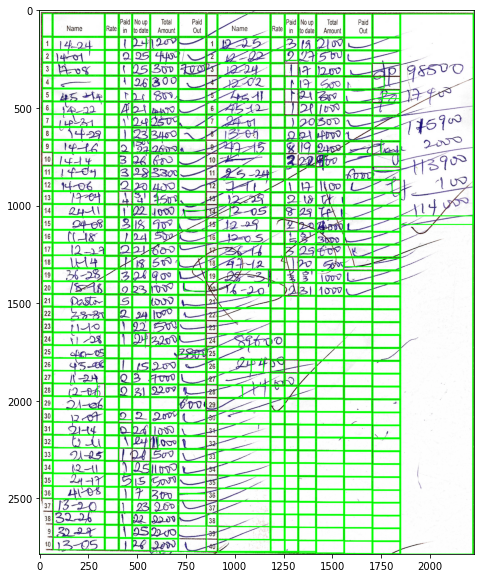

In [27]:
def table_cell_image_extractor(pdf_file_path=None, base_dir=r"/content/ICR", img_folder="sampleData/images", pdf=False, plot_img=False):
    if pdf:
        all_imgs = pdf_to_image(pdf_file_path)
        all_imgs = [np.array(i) for i in all_imgs]
    else:
        for _, _, img_file in os.walk(os.path.join(base_dir, img_folder)):
            all_imgs = img_file
            all_imgs = [cv2.imread(os.path.join(base_dir+'/'+img_folder, i)) for i in all_imgs]
    for img in all_imgs:
        stats = detect_box(img, cell_min_area=2500)

        for idx, item in enumerate(stats):
            x, y, w, h, _ = item

            img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 3)
            # roi = img[y:y+h, x:x+w]

            # cv2.imwrite(os.path.join(out_folder, f'cell_{idx+1}.jpg'), roi)
            # cv2.imwrite(os.path.join(out_folder, 'output.jpg'), img)

        if plot_img:
            cv2.imwrite(os.path.join(out_folder, 'output.jpg'), img)
            plot(img)

pdf_file_path = None #r"/content/ICR/sampleData/pdfs/wunmi.pdf"

table_cell_image_extractor(pdf_file_path=pdf_file_path, base_dir = "/content/ICR", img_folder = "sampleData/images", pdf=False, plot_img=True)

# Part 2B: Table detection using DL algorithms

# Part 3: Table Structure Recognition

# Part 4: Table cells image extractor using CV algorithms

# Part 5: Digit-strings/Text Recognition using DL

# Part 6: Post-processing and Excel spreadsheet output generation